(20, 20, 60000)
(20, 20, 10000)
(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Ntrain_3 = 6131, Ntrain_8 = 5851, Ntrain_9 = 5949


C:\Users\maing\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\maing\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


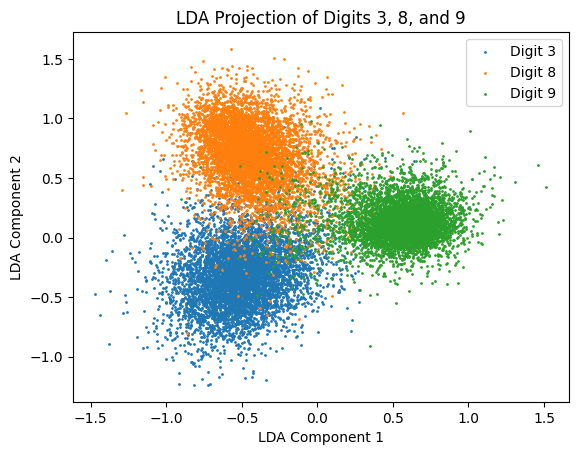

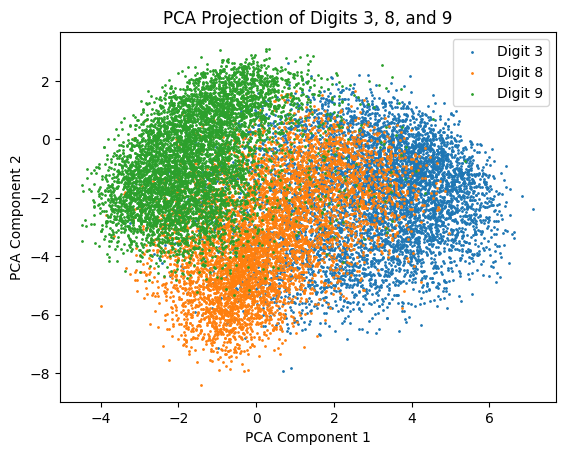

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

mnist_data = scipy.io.loadmat("mnist2.mat")
imgs_train = mnist_data['imgs_train']
imgs_test = mnist_data['imgs_test']
labels_train = np.squeeze(mnist_data['labels_train'])
labels_test = np.squeeze(mnist_data['labels_test'])
print(np.shape(imgs_train))
print(np.shape(imgs_test))  
print(np.shape(labels_train))  
print(np.shape(labels_test))   
print(labels_train[:100])
d1, d2, N = np.shape(imgs_train)

# Select images of 3, 8 and 9
Itrain_3 = np.where(labels_train == 3)[0]
Itrain_8 = np.where(labels_train == 8)[0]
Itrain_9 = np.where(labels_train == 9)[0]
imgs_train_3 = imgs_train[:, :, Itrain_3]
imgs_train_8 = imgs_train[:, :, Itrain_8]
imgs_train_9 = imgs_train[:, :, Itrain_9]
Ntrain_3 = len(Itrain_3)
Ntrain_8 = len(Itrain_8)
Ntrain_9 = len(Itrain_9)
print(f"Ntrain_3 = {Ntrain_3}, Ntrain_8 = {Ntrain_8}, Ntrain_9 = {Ntrain_9}")

X_train_3 = imgs_train_3.reshape(d1 * d2, -1).T 
X_train_8 = imgs_train_8.reshape(d1 * d2, -1).T 
X_train_9 = imgs_train_9.reshape(d1 * d2, -1).T

X_train = np.vstack([X_train_3, X_train_8, X_train_9])
y_train = np.concatenate([np.full(Ntrain_3, 3), np.full(Ntrain_8, 8), np.full(Ntrain_9, 9)])

m = np.mean(X_train, axis=0)

def lda(X, y):
    class_means = []
    for label in [3, 8, 9]:
        class_means.append(np.mean(X[y == label], axis=0))
    class_means = np.array(class_means)

    Sb = np.zeros((X.shape[1], X.shape[1]))
    for i, label in enumerate(np.unique(y)):
        n_i = np.sum(y == label)
        diff = (class_means[i] - m).reshape(-1, 1)
        Sb += n_i * diff @ diff.T

    Sw = np.zeros((X.shape[1], X.shape[1]))
    for i, label in enumerate(np.unique(y)):
        X_i = X[y == label] 
        diff = X_i - class_means[i]
        Sw += diff.T @ diff

    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(Sw) @ Sb)
    eigvecs = eigvecs[:, np.argsort(-eigvals.real)][:, :2]  
    return eigvecs

lda_components = lda(X_train, y_train)

X_lda = X_train @ lda_components

for i, digit in enumerate([3, 8, 9]):
    plt.scatter(X_lda[y_train == digit, 0], X_lda[y_train == digit, 1], label=f"Digit {digit}", s=1)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of Digits 3, 8, and 9")
plt.legend()
plt.show()

def pca(X):
    X_centered = X - np.mean(X, axis=0)
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    return Vt[:2].T

pca_components = pca(X_train)

X_pca = X_train @ pca_components

for i, digit in enumerate([3, 8, 9]):
    plt.scatter(X_pca[y_train == digit, 0], X_pca[y_train == digit, 1], label=f"Digit {digit}", s=1)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Digits 3, 8, and 9")
plt.legend()
plt.show()


In [2]:
import numpy as np
from math import pi
from scipy.special import gamma

np.random.seed(42)

def method1(d, n):
    k = 0
    for i in range(n):
        var = np.random.random(d)-0.5
        inside = np.sum([i**2 for i in var])<1
        if inside == True:
            k+=1
    return k/n
print("Method 1:")
for d in [5, 10, 15, 20]:
    print(f"Shared Volume in Dimension {d} with Method 1:", method1(d,100000))
    

def vol_ball(d):
    return pi**(d/2)/((d/2)*gamma(d/2))
    
def method2(d,n):
    k = 0
    for i in range(n):
        var = []
        for i in range(d): #method to generate Gaussians from uniforms from class
            eta1, eta2 = np.random.random(), np.random.random() #but slower
            if d % 2 == 0:
                var.append(np.sqrt(-2*np.log(eta1))*np.sin(2*np.pi*eta2))
            else:
                var.append(np.sqrt(-2*np.log(eta1))*np.cos(2*np.pi*eta2))
        #var = np.random.normal(0, 1, size=d) #placeholder
        radius = np.sqrt(np.sum([i**2 for i in var]))
        sphere_point = var/radius
        scaling_factor = np.random.random()**(1/d)
        ball_point = sphere_point * scaling_factor
        inside = np.all(np.abs(ball_point) <= 0.5)
        if inside == True:
            k+=1
    return k*vol_ball(d)/n

print("Method 2:")
for d in [5, 10, 15, 20]:
    print(f"Shared Volume in Dimension {d} with Method 2:", method2(d,100000))
    #print(vol_ball(d))

Method 1:
Shared Volume in Dimension 5 with Method 1: 0.99945
Shared Volume in Dimension 10 with Method 1: 0.76355
Shared Volume in Dimension 15 with Method 1: 0.19872
Shared Volume in Dimension 20 with Method 1: 0.01751
Method 2:
Shared Volume in Dimension 5 with Method 2: 0.9907503681989542
Shared Volume in Dimension 10 with Method 2: 0.7603314084894305
Shared Volume in Dimension 15 with Method 2: 0.19748462978064937
Shared Volume in Dimension 20 with Method 2: 0.018222762148316723
